### This is the demonstration with Tesla stocks dataset

In [184]:
#import all the library

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
#Linear
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.linear_model import LinearRegression
#KNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
%matplotlib inline

# rcParams['figure.figsize'] = 20,10

#normalizing data with min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('tsla.csv')
print(df.columns)

#print the head

#common func 
def cal_RSME(test, preds):
  return np.sqrt(np.mean(np.power((np.array(test)-preds),2)))

def plot_graph(train, test, train_date, test_date):
  plt.figure(figsize=(16,8))
  line1=plt.plot(train_date,train['Close'])
  line2,line3=plt.plot(test_date, test[['Close', 'Predictions']])
  plt.rc('grid', linestyle="-", color='black')
  plt.grid(True)
  plt.legend([line1,line2,line3],["Train data set's actual price","Actual Price- Test","Predicted Price"],loc='lower right')

def insert_more_date_feature(data_frame, field_name, drop=True):
    fld = data_frame[field_name]
    if not np.issubdtype(fld.dtype, np.datetime64):
        data_frame[field_name] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', field_name)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        data_frame[targ_pre+n] = getattr(fld.dt,n.lower())
    data_frame[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: data_frame.drop(field_name, axis=1, inplace=True)

df.head()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900




```
# This is formatted as code
```

### Indexing data as per the date

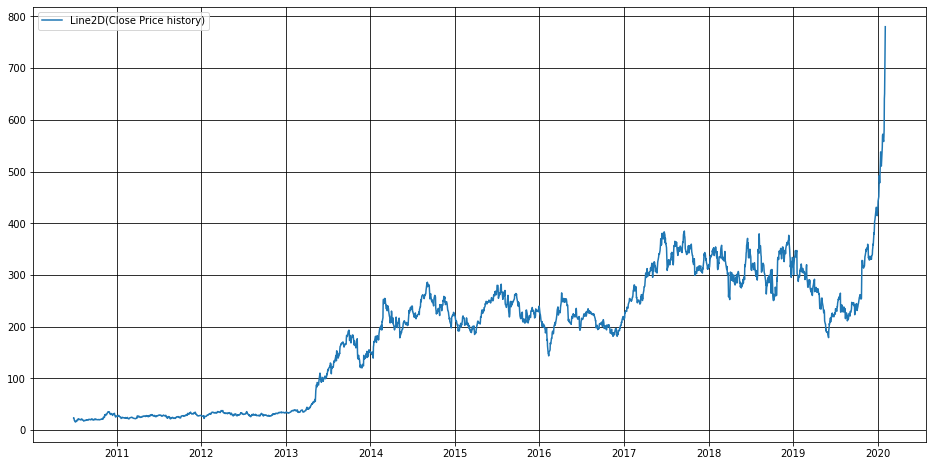

In [185]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
line = plt.plot(df['Date'], df['Close'],label='Close Price history')
plt.rc('grid', linestyle="-", color='black')
plt.legend(line)
plt.grid(True)

## 1. Exponential Moving Average

In [186]:
# reading the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
used_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     used_data['Date'][i] = data['Date'][i]
     used_data['Close'][i] = data['Close'][i]


# splitting into train and validation
train = used_data[:987]
test = used_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

window_size = 20

preds = test['Close'].ewm(span=window_size).mean()

# RMSE Value
rms=cal_RSME(test['Close'],preds)
print('\nRMSE:', rms)

                 Date       Open   High  ...      Close  Adj Close    Volume
Date                                     ...                                
2010-06-29 2010-06-29  19.000000  25.00  ...  23.889999  23.889999  18766300
2010-06-30 2010-06-30  25.790001  30.42  ...  23.830000  23.830000  17187100
2010-07-01 2010-07-01  25.000000  25.92  ...  21.959999  21.959999   8218800
2010-07-02 2010-07-02  23.000000  23.10  ...  19.200001  19.200001   5139800
2010-07-06 2010-07-06  20.000000  20.00  ...  16.110001  16.110001   6866900

[5 rows x 7 columns]

 Shape of the data:
(2416, 7)

 Shape of training set:
(987, 2)

 Shape of validation set:
(1429, 1)

RMSE: 18.379172908910125


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f793321af98>] instances.
A proxy artist may be used instead.
See: http

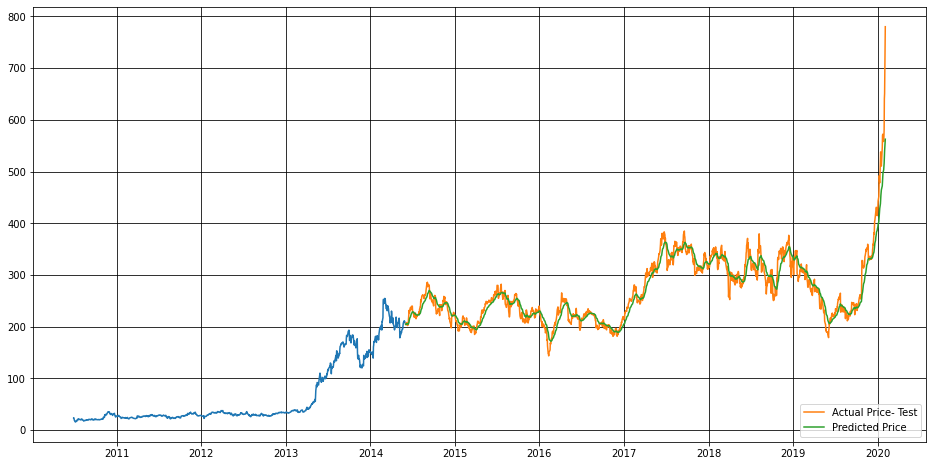

In [187]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds
plot_graph(train,test, train['Date'], test['Date'])

## 2. Linear Regression

In [188]:
insert_more_date_feature(used_data, 'Date')
used_data.drop('Elapsed', axis=1, inplace=True)  

#first day and last day of week have price fluctuated, so we also add mon_fri feature
used_data['mon_fri'] = 0
for i in range(0,len(used_data)):
    if (used_data['Dayofweek'][i] == 0 or used_data['Dayofweek'][i] == 4):
        used_data['mon_fri'][i] = 1
    else:
        used_data['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [189]:
#split into train and validation
train = used_data[:987]
test = used_data[987:]

#fill NaN with zero
train.fillna(0)

x_train = train.drop('Close', axis=1)
x_test = test.drop('Close', axis=1)
y_train = train['Close']
y_test = test['Close']

model = LinearRegression()
model.fit(x_train,y_train)
print('Transformed data set')
x_train.head()


Transformed data set


,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,2010,6,26,29,1,180,False,False,False,False,False,False,0
1,2010,6,26,30,2,181,True,False,True,False,False,False,0
2,2010,7,26,1,3,182,False,True,False,True,False,False,0
3,2010,7,26,2,4,183,False,False,False,False,False,False,1
4,2010,7,27,6,1,187,False,False,False,False,False,False,0


#### RMSE Value 

In [190]:
preds = model.predict(x_test)
rms=cal_RSME(y_test,preds)
print('\nRMSE:', rms)


RMSE: 69.61239559213955


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f79334020f0>] instances.
A proxy artist may be used instead.
See: http

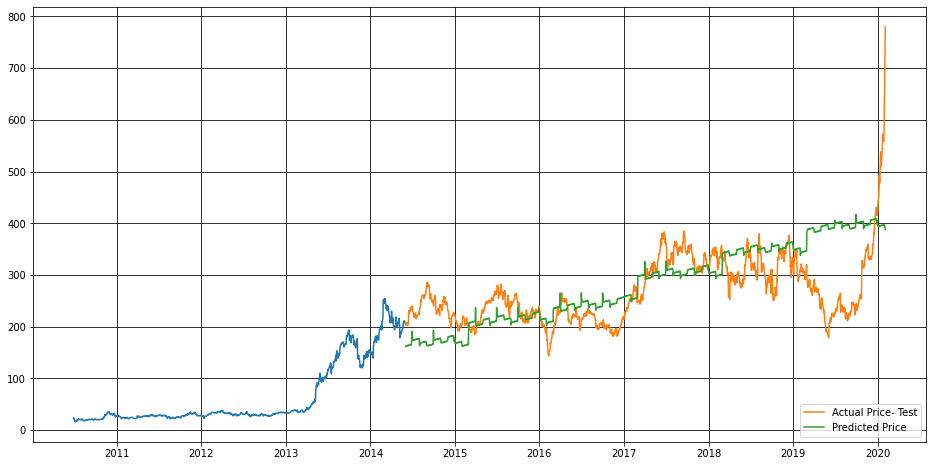

In [191]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

valid.index = used_data[987:].index
train.index = used_data[:987].index
plot_graph(train,test, df['Date'][:987], df['Date'][987:])

## 3. K Nearest Neighbor Algorithm

In [192]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

#applying gridSearchCV to find the best K-neighbor based on defined numbers
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

print(model)
#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


#### RMSE Value

In [193]:
#rmse
rms=cal_RSME(test['Close'],preds)
print('\nRMSE:', rms)


RMSE: 222.9417886676218


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f79332b8fd0>] instances.
A proxy artist may be used instead.
See: http

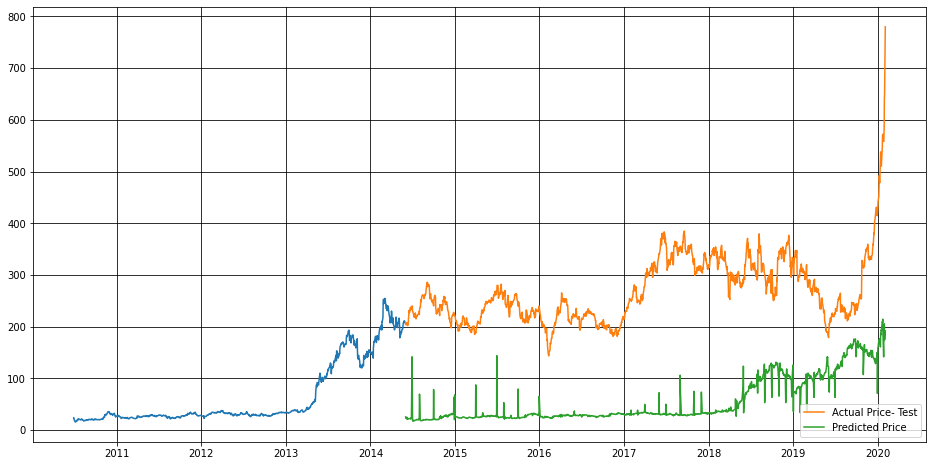

In [194]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds
plot_graph(train,test, df['Date'][:987], df['Date'][987:])

## 4. LSTM (only for demo) to show one of the best method nowadays

In [181]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
used_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    used_data['Date'][i] = data['Date'][i]
    used_data['Close'][i] = data['Close'][i]

#setting index
used_data.index = used_data.Date
used_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = used_data.values

train = dataset[0:987,:]
test = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = used_data[len(used_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 35s - loss: 3.5032e-04


#### RMSE Value 

In [182]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print('\nRMSE:', rms)


RMSE: Close    21.612578
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f79333a6f60>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


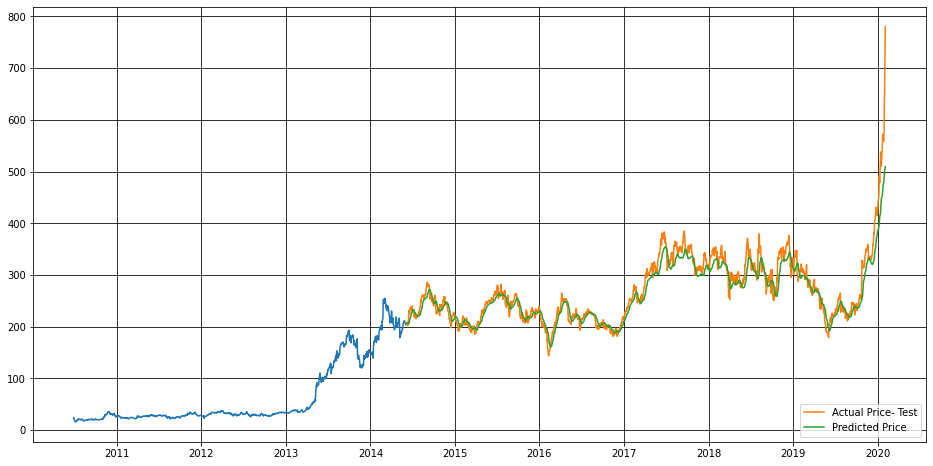

In [183]:
#for plotting
train = used_data[:987]
test = used_data[987:]
test['Predictions'] = closing_price
plot_graph(train,test, df['Date'][:987], df['Date'][987:])